<a href="https://colab.research.google.com/github/diamantron/seq2sql/blob/master/stock_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Predict stock prices using a neural network
# ============================================

In [334]:
# Import libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras import optimizers
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Get the stock quote
df = web.DataReader('AMZN', data_source='yahoo', start='2000-01-01', end='2020-12-31')
# other options: INTC, BTC-USD

# Show the data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2000-01-03,89.562500,79.046875,81.500000,89.375000,16117600,89.375000
2000-01-04,91.500000,81.750000,85.375000,81.937500,17487400,81.937500
2000-01-05,75.125000,68.000000,70.500000,69.750000,38457400,69.750000
2000-01-06,72.687500,64.000000,71.312500,65.562500,18752000,65.562500
2000-01-07,70.500000,66.187500,67.000000,69.562500,10505400,69.562500
...,...,...,...,...,...,...
2020-12-18,3249.419922,3171.600098,3243.989990,3201.649902,5995700,3201.649902
2020-12-21,3226.969971,3166.000000,3200.010010,3206.179932,3836800,3206.179932
2020-12-22,3222.000000,3180.080078,3202.840088,3206.520020,2369400,3206.520020


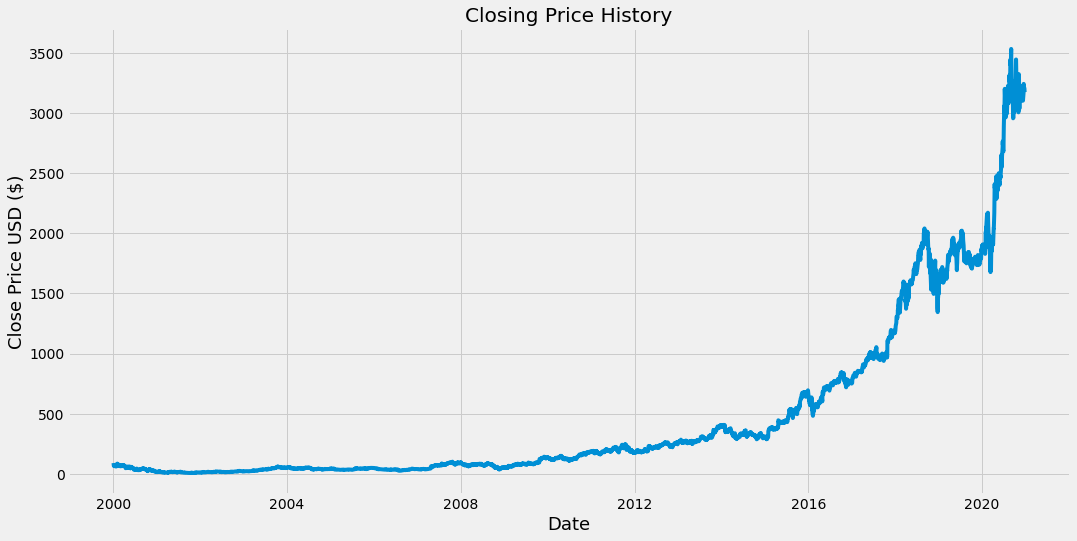

In [335]:
# Visualize the stock performance
plt.figure(figsize=(16,8))
plt.title('Closing Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel ('Close Price USD ($)', fontsize=18)
plt.show()

In [336]:
# Create a new dataframe with only the 'close' column
data = df.filter(['Date', 'Close'])

# Convert the dataframe to a numpy array
dataset = data.values

# Split the dataset into training/validation sets
training_data_len = math.ceil((len(dataset)) * 0.8)

# Normalize the input data
scaler = MinMaxScaler(feature_range=(0,1))

scaled_dataset = scaler.fit_transform(dataset)

# Create the training dataset
train_window = 200
future_outlook = 30
train_data = scaled_dataset[:training_data_len+future_outlook, :]

# split the data into x_train and y_train
x_train = []
y_train = []

for i in range(train_window, training_data_len):
  x_train.append(train_data[i-train_window:i, 0])
  y_train.append(np.mean(train_data[i : i+future_outlook, 0]))
  if (i <= train_window):
    print (x_train)
    print (y_train)
    print ("--")

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

[array([0.02365777, 0.02154813, 0.01809115, 0.01690337, 0.01803797,
       0.0179316 , 0.01724021, 0.01633607, 0.01700974, 0.01653108,
       0.01649563, 0.01725793, 0.01667291, 0.0159106 , 0.01819752,
       0.01794933, 0.01669064, 0.01729339, 0.01580423, 0.01661972,
       0.01743521, 0.01800251, 0.02218634, 0.02059081, 0.01958031,
       0.02188496, 0.02106947, 0.01991715, 0.01991715, 0.01942076,
       0.01924348, 0.01835708, 0.01787842, 0.01667291, 0.01633607,
       0.01828616, 0.01771886, 0.01791387, 0.01695656, 0.01784296,
       0.01699201, 0.01605242, 0.0160347 , 0.01644244, 0.01631835,
       0.0163538 , 0.01782523, 0.01727566, 0.01683246, 0.0169211 ,
       0.01638926, 0.01709838, 0.01669064, 0.01651335, 0.01883573,
       0.01835708, 0.01750613, 0.01892437, 0.01904847, 0.01819752,
       0.01709838, 0.01716929, 0.01731112, 0.01633607, 0.01644244,
       0.01594606, 0.01653108, 0.01747067, 0.01628289, 0.01628289,
       0.01429734, 0.01192178, 0.01160268, 0.01165586, 0.0138

(4024, 200, 1)

In [346]:
# Build the LSTM model:
hidden_size = 50
dropout_rate = 0.4
model = Sequential()
model.add(LSTM(hidden_size, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(hidden_size, return_sequences=True, dropout=dropout_rate))
model.add(LSTM(hidden_size, return_sequences=True, dropout=dropout_rate))
model.add(LSTM(hidden_size, return_sequences=False, dropout=dropout_rate))
model.add(Dense(1))

# Compile the model
opt = optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=opt, loss='mean_absolute_percentage_error')
# Train the model
model.fit(x_train, y_train, batch_size=32, epochs=8)

Epoch 1/8
126/126 [==============================] - 8s 29ms/step - loss: 64.0037
Epoch 2/8
126/126 [==============================] - 4s 28ms/step - loss: 24.0776
Epoch 3/8
126/126 [==============================] - 4s 28ms/step - loss: 19.6695
Epoch 4/8
126/126 [==============================] - 4s 28ms/step - loss: 18.9268
Epoch 5/8
126/126 [==============================] - 4s 28ms/step - loss: 18.8982
Epoch 6/8
126/126 [==============================] - 4s 28ms/step - loss: 17.2586
Epoch 7/8
126/126 [==============================] - 3s 28ms/step - loss: 16.7746
Epoch 8/8
126/126 [==============================] - 4s 28ms/step - loss: 18.1883


In [347]:
# Create the testing dataset
test_data = dataset[training_data_len-train_window: , :]
scaled_test_data = scaled_dataset[training_data_len-train_window: , :]

x_test = []
y_test = []

for i in range(train_window, len(test_data)-future_outlook):
  x_test.append(scaled_test_data[i-train_window:i, 0])
  y_test.append(np.mean(test_data[i:i+future_outlook, 0]))
y_test = np.reshape(y_test, [np.shape(y_test)[0], 1])

# Convert the data into a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the model's predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error
relative_err = np.mean(np.abs(predictions - y_test)/y_test)
relative_err

0.06447607945134172

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


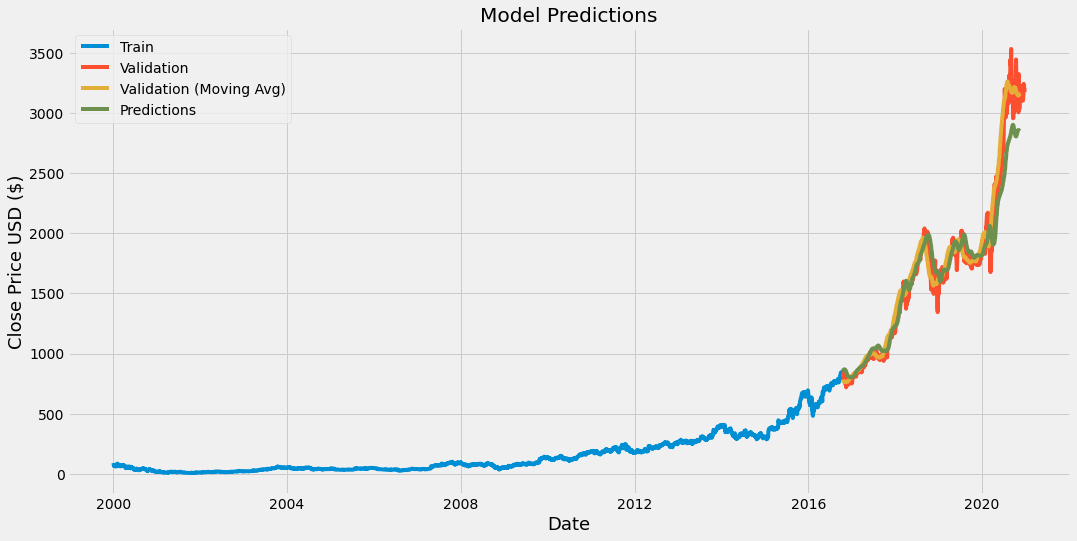

In [348]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
moving_avg = data[training_data_len:-future_outlook]
moving_avg['Validation (Moving Avg)'] = y_test
moving_avg['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model Predictions')
plt.xlabel('Date', fontsize=18)
plt.ylabel ('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid['Close'])
plt.plot(moving_avg['Validation (Moving Avg)'])
plt.plot(moving_avg['Predictions'])
plt.legend(['Train', 'Validation', 'Validation (Moving Avg)', 'Predictions'], loc='upper left')
plt.show()